In [1]:
import numpy as np
import matplotlib.pyplot as plt
import velocyto as vcy
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import JTSNEBASE, JTSNE
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [57]:
expr_mat_pd = pd.read_csv('/data/hoan/multiomics/astar_seq/data/GSE123899_CB_Differentiation_FPKM.txt', sep ='\t', index_col=0)

In [58]:
expr_mat_pd.head(10)

,D10R_10_0,D10R_11_0,D10R_12_0,D10R_13_0,D10R_14_0,D10R_15_0,D10R_16_0,D10R_17_0,D10R_18_0,D10R_19_0,...,D8_2R_8_0,D8_2R_90_0,D8_2R_91_0,D8_2R_92_0,D8_2R_93_0,D8_2R_94_0,D8_2R_95_0,D8_2R_96_0,D8_2R_9_0,D8_2_STAR_RNA_0
tracking_id,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2MP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3GALT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4GALT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print(np.unique(expr_mat_pd.columns))

In [76]:
days = [day[0:3] for day in expr_mat_pd.columns]
day_2_int = {'D10': 0, 'D12': 1, 'D6R': 2, 'D6_': 2, 'D8_': 3}
days_int = [day_2_int[day] for day in days]

In [60]:
expr_mat_pd.shape

(27837, 480)

### Preprocessing RNA data

In [61]:
scale_factor = 10000
expr_mat = expr_mat_pd.values
expr_mat_log_t = np.log(scale_factor*expr_mat + 1.0)

In [25]:
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)

In [29]:
expr_reduced.shape

(480, 20)

In [47]:
rna_tsne = TSNE(init='pca').fit_transform(expr_reduced)

In [51]:
from anndata import AnnData
import scanpy.api as sc
adata = AnnData(X=expr_reduced)
sc.pp.neighbors(adata, use_rep='X')
sc.tl.louvain(adata, key_added='louvain', resolution = 0.5)
louv_labels = np.array(adata.obs['louvain'].tolist())
louv_labels = [int(x) for x in louv_labels]

In [52]:
np.unique(louv_labels)

array([0, 1, 2, 3])

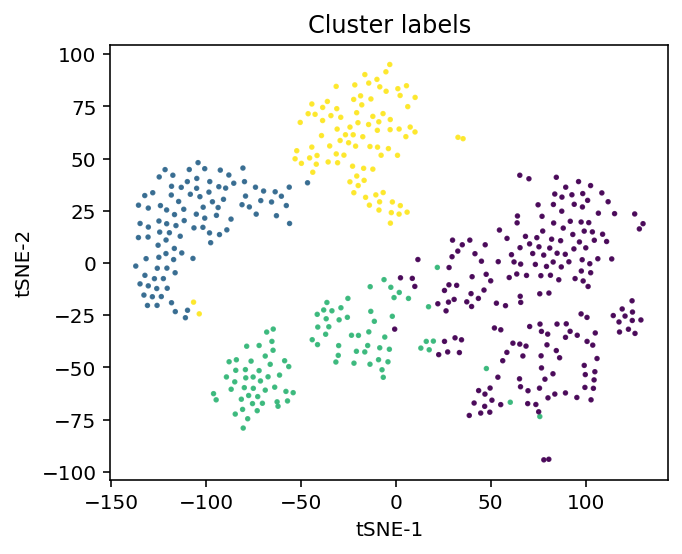

In [69]:
plt.figure(figsize=(5,4))
plt.scatter(rna_tsne[:,0], rna_tsne[:,1], s=3, c = louv_labels, alpha=0.9)
plt.title('Cluster labels')
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

In [77]:
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g', 'orange'])
classes = ['D10', 'D12', 'D6', 'D8']

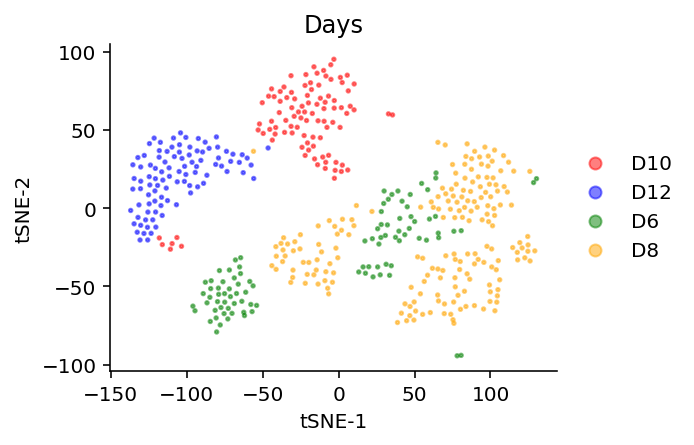

In [78]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
scatter =ax.scatter(rna_tsne[:,0], rna_tsne[:,1],s=3, c = days_int, alpha=0.5, cmap=colours)
lgd = ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Days')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#plt.savefig('/data/hoan/plots/snare_tsne_3modalities.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### ATAC-seq

In [82]:
atac_mat_pd  = pd.read_csv('/data/hoan/multiomics/astar_seq/data/GSE123895_Z_Motifs.txt', sep ='\t', index_col=0)

In [83]:
atac_mat_pd

,D6A-13.FCHVJ75BBXX_L3_ICGTACTAG-TTTCTAGCAligned.sortedByCoord.out.bam.dup,D6A-46.FCHVJ75BBXX_L3_ITAGGCATG-TAACCAAGAligned.sortedByCoord.out.bam.dup,D6A-89.FCHVJ75BBXX_L3_IGTAGAGGA-TGGAAATCAligned.sortedByCoord.out.bam.dup,D8_1A-10.FCHVJ75BBXX_L4_ICGTACTAG-CTCTCTATAligned.sortedByCoord.out.bam.dup,D8_1A-14.FCHVJ75BBXX_L4_ICGTACTAG-ACTGCATAAligned.sortedByCoord.out.bam.dup,D8_1A-33.FCHVJ75BBXX_L4_IGGACTCCT-TAGATCGCAligned.sortedByCoord.out.bam.dup,D8_1A-34.FCHVJ75BBXX_L4_IGGACTCCT-CTCTCTATAligned.sortedByCoord.out.bam.dup,D8_1A-36.FCHVJ75BBXX_L4_IGGACTCCT-AGAGTAGAAligned.sortedByCoord.out.bam.dup,D8_1A-41.FCHVJ75BBXX_L4_ITAGGCATG-TAGATCGCAligned.sortedByCoord.out.bam.dup,D8_1A-49.FCHVJ75BBXX_L4_ICTCTCTAC-TAGATCGCAligned.sortedByCoord.out.bam.dup,...,D12A-9.FCHVJ75BBXX_L5_ICGTACTAG-TGGAAATCAligned.sortedByCoord.out.bam.dup,D6A-10.FCHVJ75BBXX_L3_ICGTACTAG-AACATGATAligned.sortedByCoord.out.bam.dup,D6A-48.FCHVJ75BBXX_L3_ITAGGCATG-TCCATCAAAligned.sortedByCoord.out.bam.dup,D6A-83.FCHVJ75BBXX_L3_IAAGAGGCA-TGATGAAAAligned.sortedByCoord.out.bam.dup,D6A-9.FCHVJ75BBXX_L3_ICGTACTAG-TGGAAATCAligned.sortedByCoord.out.bam.dup,D8_1A-60.FCHVJ75BBXX_L4_ICAGAGAGG-AGAGTAGAAligned.sortedByCoord.out.bam.dup,D8_2A-11.FCHVJ75BBXX_L4_ICGTACTAG-TGATGAAAAligned.sortedByCoord.out.bam.dup,D8_2A-50.FCHVJ75BBXX_L4_ICTCTCTAC-AACATGATAligned.sortedByCoord.out.bam.dup,D8_2A-60.FCHVJ75BBXX_L4_ICAGAGAGG-GTCGGACTAligned.sortedByCoord.out.bam.dup,D8_2A-61.FCHVJ75BBXX_L4_ICAGAGAGG-TTTCTAGCAligned.sortedByCoord.out.bam.dup
MA0025.1_NFIL3,-0.676099,-0.529389,-0.664438,0.362523,-0.570345,1.117735,0.918765,-0.780909,-0.445971,-0.945980,...,-1.045283,0.265719,0.499644,0.990128,1.341425,0.433529,-0.812274,-0.602079,0.174487,-0.125812
MA0030.1_FOXF2,0.350353,2.142122,0.854086,0.052249,-0.883534,-0.027201,1.518122,-0.701346,0.716807,-0.990869,...,-0.537846,0.897318,0.208021,-0.566695,0.952860,1.200716,-0.465574,-0.483133,1.518678,0.349337
MA0031.1_FOXD1,1.317047,-0.504184,-0.773238,-0.895043,2.078996,-0.955169,1.118768,-0.446939,1.375567,0.537726,...,0.174550,-0.809871,1.953020,-0.856071,-0.509921,-0.941510,0.452782,1.098300,1.785560,-0.861409
MA0051.1_IRF2,-1.597788,-0.188339,-0.746468,0.001493,-0.447694,-1.478252,-0.566932,-0.830604,-0.310412,1.430868,...,0.748964,0.295364,1.965031,1.327892,-0.025259,1.824719,-0.454841,1.831225,0.796543,-0.810414
MA0056.1_MZF1,0.365088,0.324238,0.616008,0.615679,-0.728966,1.047858,0.341003,1.228140,-0.922162,-0.875775,...,-0.032031,0.071284,1.424344,-0.194285,0.145617,-0.806691,0.272130,-0.523699,0.383296,-1.308815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA0906.1_HOXC12,-0.173643,-0.246135,-0.331805,-1.161678,1.102706,-0.436684,1.310271,-0.429443,0.418399,0.357891,...,-1.355614,-0.840266,0.578723,1.467946,0.492438,-0.671630,2.257716,0.481757,1.302338,-0.244716
MA0907.1_HOXC13,-0.397866,0.987946,-0.982076,0.592779,2.741090,-0.959644,2.019881,-0.783775,0.165968,-0.385992,...,-1.432366,0.912877,-1.527973,0.308128,0.032887,0.237892,-0.203847,1.330797,1.289648,-0.084925
MA0908.1_HOXD11,-0.320127,-0.238560,0.232880,-1.236376,1.101188,-0.785118,1.662105,-0.647216,1.115725,0.974099,...,-1.355349,-0.637766,-0.157576,0.842115,1.229096,-1.048316,0.785478,0.470835,1.383639,-0.476684
MA0909.1_HOXD13,0.661322,-0.546180,0.710609,-0.323609,-1.318700,0.118097,0.778357,0.926887,-0.772518,-0.144561,...,-0.272372,-0.064953,0.935969,0.056954,0.294591,0.732829,-0.349424,-0.906582,-0.845969,-0.296918


In [84]:
atac_mat_pd.shape

(386, 206)

In [85]:
atac_reduced = PCA(n_components=10).fit_transform(atac_mat_pd.values.T)

In [86]:
atac_reduced.shape

(206, 10)

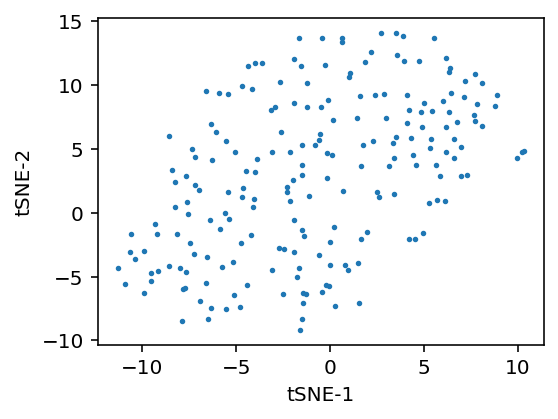

In [88]:
joint_tsne = TSNE(init='pca').fit_transform(atac_reduced)
plt.figure(figsize=(4, 3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

In [89]:
atac_mat_pd.columns

Index(['D6A-13.FCHVJ75BBXX_L3_ICGTACTAG-TTTCTAGCAligned.sortedByCoord.out.bam.dup',
       'D6A-46.FCHVJ75BBXX_L3_ITAGGCATG-TAACCAAGAligned.sortedByCoord.out.bam.dup',
       'D6A-89.FCHVJ75BBXX_L3_IGTAGAGGA-TGGAAATCAligned.sortedByCoord.out.bam.dup',
       'D8_1A-10.FCHVJ75BBXX_L4_ICGTACTAG-CTCTCTATAligned.sortedByCoord.out.bam.dup',
       'D8_1A-14.FCHVJ75BBXX_L4_ICGTACTAG-ACTGCATAAligned.sortedByCoord.out.bam.dup',
       'D8_1A-33.FCHVJ75BBXX_L4_IGGACTCCT-TAGATCGCAligned.sortedByCoord.out.bam.dup',
       'D8_1A-34.FCHVJ75BBXX_L4_IGGACTCCT-CTCTCTATAligned.sortedByCoord.out.bam.dup',
       'D8_1A-36.FCHVJ75BBXX_L4_IGGACTCCT-AGAGTAGAAligned.sortedByCoord.out.bam.dup',
       'D8_1A-41.FCHVJ75BBXX_L4_ITAGGCATG-TAGATCGCAligned.sortedByCoord.out.bam.dup',
       'D8_1A-49.FCHVJ75BBXX_L4_ICTCTCTAC-TAGATCGCAligned.sortedByCoord.out.bam.dup',
       ...
       'D12A-9.FCHVJ75BBXX_L5_ICGTACTAG-TGGAAATCAligned.sortedByCoord.out.bam.dup',
       'D6A-10.FCHVJ75BBXX_L3_ICGTACTAG-AACATGATAli

In [92]:
expr_mat_pd.columns

Index(['D10R_10_0', 'D10R_11_0', 'D10R_12_0', 'D10R_13_0', 'D10R_14_0',
       'D10R_15_0', 'D10R_16_0', 'D10R_17_0', 'D10R_18_0', 'D10R_19_0',
       ...
       'D8_2R_8_0', 'D8_2R_90_0', 'D8_2R_91_0', 'D8_2R_92_0', 'D8_2R_93_0',
       'D8_2R_94_0', 'D8_2R_95_0', 'D8_2R_96_0', 'D8_2R_9_0',
       'D8_2_STAR_RNA_0'],
      dtype='object', length=480)